In [1]:
import sys  
sys.path.append('/home/akapoor/miniconda3/envs/MARKETS/lib/python3.8/site-packages/')
import pandas as pd
df=pd.read_csv('bigfile.csv')  

In [2]:
df['Dates'] = pd.to_datetime(df['date']).dt.date
df['Time'] = pd.to_datetime(df['date']).dt.time
df['Hour'] = pd.to_datetime(df['date']).dt.hour

In [3]:
df=df.assign(session=pd.cut(pd.to_datetime(df['date']).dt.hour,
                            [8,11,14,16],
                            labels=['Morning','Afternoon','Evening']))

In [4]:
df['Month'] = pd.to_datetime(df['date']).dt.month

In [6]:
dfstd=df.groupby(['Dates','session']).std().reset_index()

In [7]:
dfstd.head(7)

,Dates,session,open,high,low,close,volume,Hour,Month
0,2021-07-01,Morning,15.023927,15.231974,14.104843,14.672331,0.0,0.794940,0.0
1,2021-07-01,Afternoon,10.545406,10.532127,10.631538,10.703080,0.0,0.818774,0.0
2,2021-07-01,Evening,6.977225,7.110367,7.317892,7.380035,0.0,0.000000,0.0
3,2021-07-02,Morning,10.672307,10.662307,10.191423,10.342299,0.0,0.794940,0.0
4,2021-07-02,Afternoon,9.716060,9.858439,9.594955,9.694692,0.0,0.818774,0.0
5,2021-07-02,Evening,8.934082,7.830188,9.116230,7.792361,0.0,0.000000,0.0
6,2021-07-05,Morning,9.802196,8.751590,10.729491,9.602765,0.0,0.794940,0.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'NIFT 50 - July to Dec 2021')

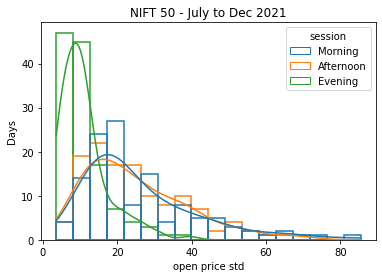

In [13]:
ax=plt.gca()
sns.histplot(dfstd,hue='session',x='open',fill=False,kde=True,ax=ax,legend=True)
ax.set_xlabel("open price std")
ax.set_ylabel("Days")
ax.set_title("NIFT 50 - July to Dec 2021")